# Image classification with Convolutional Neural Networks
---

# Import Libraries

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [63]:
# This file contains all the main external libs we'll use
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

# Global Config

In [46]:
PATH = "../data/dogscats/dogscats/"
sz=224
arch=vgg16
bs=64

In [47]:
# Uncomment the below if you need to reset your precomputed activations
!rm -rf {PATH}tmp

# Downloading Data

In [6]:
!wget http://files.fast.ai/data/dogscats.zip -O ../data/dogscats.zip


--2018-05-17 11:53:47--  http://files.fast.ai/data/dogscats.zip
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857214334 (818M) [application/zip]
Saving to: ‘../data/dogscats.zip’

../data/dogscats.zi 100%[===================>] 817.50M  15.8MB/s    in 55s     

2018-05-17 11:54:42 (14.9 MB/s) - ‘../data/dogscats.zip’ saved [857214334/857214334]



In [9]:
!unzip -q ../data/dogscats.zip -d ../data/dogscats

# Training

## 1. Train last layer for 3 cycles with Precompute

In [48]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz), bs=bs)

In [49]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████| 32/32 [00:22<00:00,  1.43it/s]


In [50]:
learn.fit(0.01, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.05325    0.032357   0.985     
    1      0.049779   0.029702   0.9905    
    2      0.045871   0.028027   0.9875    


[array([0.02803]), 0.9875]

## 2. Two more epochs with data augmentation

In [19]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [20]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [21]:
learn.fit(lrs = 1e-2, n_cycle = 2)

epoch      trn_loss   val_loss   accuracy   
    0      0.058456   0.031248   0.99      
    1      0.045616   0.025452   0.9915    



[array([0.02545]), 0.9915000004768372]

## Experiment: Train 1 epoch without Precomputation takes longer

In [22]:
learn.precompute=False

In [23]:
learn.fit(1e-2, 1, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.054718   0.024734   0.991     



[array([0.02473]), 0.9910000004768371]

**It takes way long to run a single epoch with precomputation turned off.**

In [24]:
learn.precompute=True

## 3. Training with Differential Learning Rate

___

**The learning rate finder does an entire epoch without finding a sufficient drop in the loss and then quits. This might be due to the large batch size of 64 on the dogs & cats dataset.**

In [35]:
learn.lr_find()

 89%|████████▉ | 161/180 [00:04<00:00, 34.28it/s, loss=0.144]


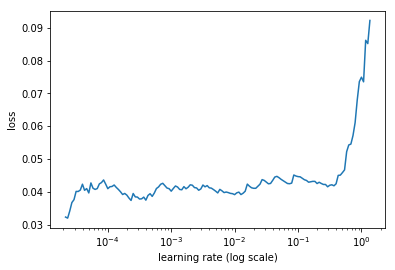

In [36]:
learn.sched.plot()

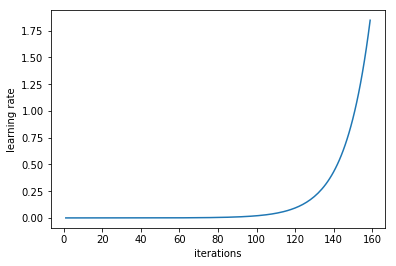

In [32]:
learn.sched.plot_lr()

In [ ]:
learn.unfreeze()

In [41]:
learn.lr_find()

[autoreload of fastai.sgdr failed: Traceback (most recent call last):
  File "/home/ainsteinx/anaconda3/envs/fastai/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/ainsteinx/anaconda3/envs/fastai/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 384, in superreload
    update_generic(old_obj, new_obj)
  File "/home/ainsteinx/anaconda3/envs/fastai/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 323, in update_generic
    update(a, b)
  File "/home/ainsteinx/anaconda3/envs/fastai/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 288, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/home/ainsteinx/anaconda3/envs/fastai/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 323, in update_generic
    update(a, b)
  File "/home/ainsteinx/anaconda3/envs/fastai/lib/python3.6/site-packages/IPython/extensions/

 87%|████████▋ | 157/180 [03:53<00:34,  1.49s/it, loss=0.199]

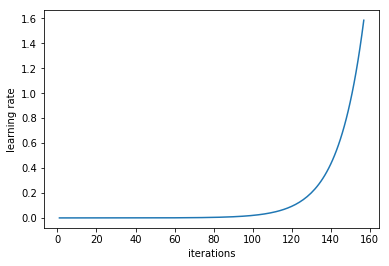

In [42]:
learn.sched.plot_lr()

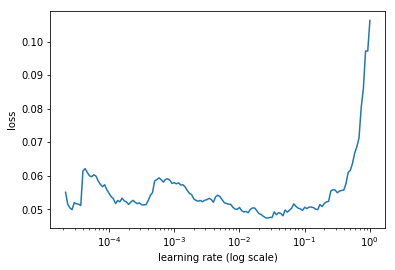

In [43]:
learn.sched.plot()

____

**This is with batch size of 64**

In [51]:
learn.lr_find()

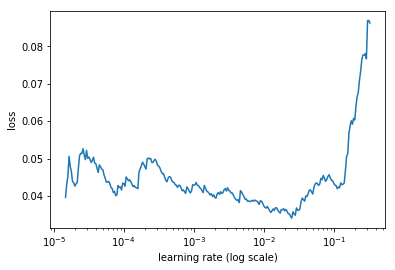

In [52]:
learn.sched.plot()

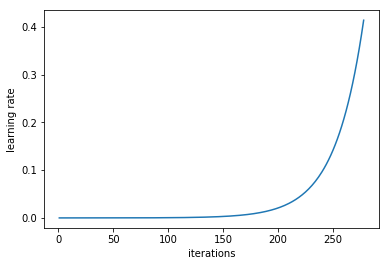

In [53]:
learn.sched.plot_lr()

In [54]:
learn.unfreeze()

In [55]:
learn.lr_find()

 78%|███████▊  | 282/360 [03:19<00:55,  1.41it/s, loss=0.185]

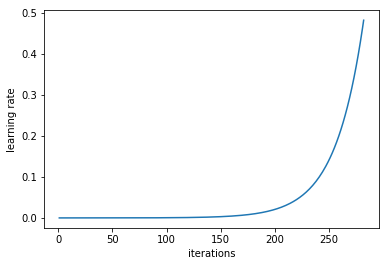

In [56]:
learn.sched.plot_lr()

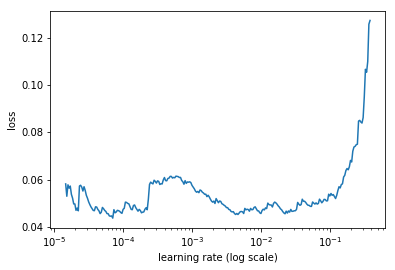

In [57]:
learn.sched.plot()

___

**Modifying the lr_find(...) function to include run_for parameter**

Run For: 2

In [65]:
learn.lr_find(run_for=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.045843   0.028053   0.9895    
 50%|█████     | 180/360 [02:07<02:07,  1.41it/s, loss=0.161]

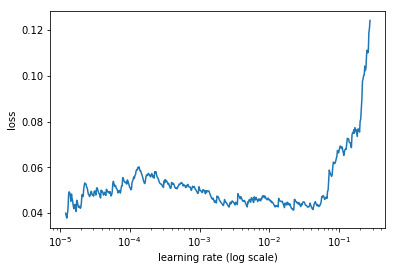

In [66]:
learn.sched.plot()

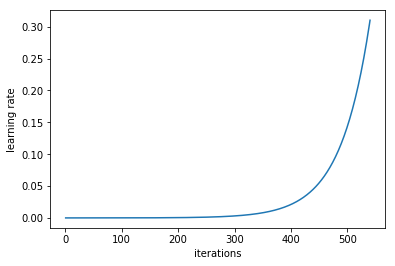

In [67]:
learn.sched.plot_lr()

Run For: 3

In [68]:
learn.lr_find(run_for=3)

epoch      trn_loss   val_loss   accuracy   
    0      0.045645   0.02851    0.988     
    1      0.084504   0.0526     0.9845    
 21%|██▏       | 77/360 [00:54<03:20,  1.41it/s, loss=0.154]

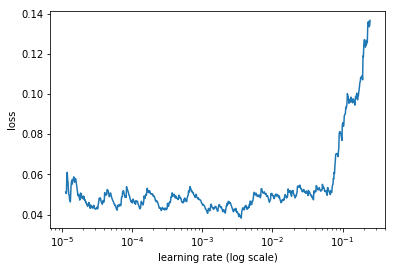

In [69]:
learn.sched.plot()

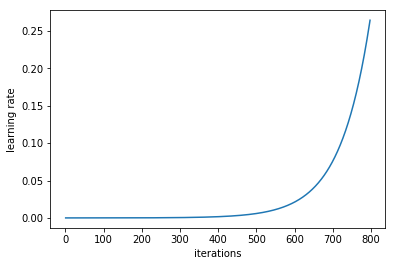

In [70]:
learn.sched.plot_lr()

___

In [44]:
lr=np.array([1e-4,1e-3,1e-2])

In [ ]:
learn.fit(lr, 1, cycle_len=1)

In [11]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.05955  0.02217  0.9917 ]                         
[ 1.       0.03902  0.0181   0.99414]                         
[ 2.       0.03676  0.0168   0.99414]                         
[ 3.       0.03097  0.01607  0.99316]                         
[ 4.       0.02823  0.01574  0.99316]                         
[ 5.       0.02663  0.01448  0.99316]                         
[ 6.       0.03113  0.01642  0.99414]                         



In [14]:
learn.fit(lr, 3, cycle_len=3)

A Jupyter Widget

[ 0.       0.02769  0.01896  0.99268]                         
[ 1.       0.01939  0.01417  0.99365]                         
[ 2.       0.01935  0.0142   0.99414]                         
[ 3.       0.02465  0.01641  0.99316]                         
[ 4.       0.02753  0.01376  0.99365]                         
[ 5.       0.01721  0.01413  0.99414]                         
[ 6.       0.0221   0.01317  0.99365]                         
[ 7.       0.01789  0.01379  0.99268]                         
[ 8.       0.01861  0.0139   0.99316]                         



In [15]:
log_preds,y = learn.TTA()
accuracy(log_preds,y)

0.995